This example shows using a simple cotengra optimizer to find a contraction 
tree for a quantum circuit amplitude, using the high level interface of `quimb`.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import cotengra as ctg

In [2]:
# get the circuit
circ = qtn.Circuit.from_qasm_file('circuit_n53_m20_s0_e0_pABCDCDAB.qsim')
circ

<Circuit(n=53, num_gates=3263, gate_opts={'contract': 'auto-split-gate', 'propagate_tags': 'register'})>

In [3]:
# the contraction optimizer
opt = ctg.HyperOptimizer(
    reconf_opts={},
    parallel="dask",
    progbar=True,
)

/media/johnnie/Storage2TB/Sync/dev/python/cotengra/cotengra/parallel.py:278: UserWarning: Parallel specified but no existing global dask client found... created one (with 8 workers).
  warnings.warn(


In [4]:
# we can supply it anywhere that takes an `optimize` kwarg:
rehs = circ.amplitude_rehearse(optimize=opt)

log2[SIZE]: 54.00 log10[FLOPs]: 18.30: 100%|██████████| 128/128 [02:18<00:00,  1.08s/it]


In [5]:
# get the core information
width = rehs['W']
cost = rehs['C']

# n.b. discrepency with flops above is that `opt_einsum` reports
# flops assuming real dtype (2 * cost), complex would be (8 * cost)
width, cost

(54.0, 18.30316844521022)

# inspecting:

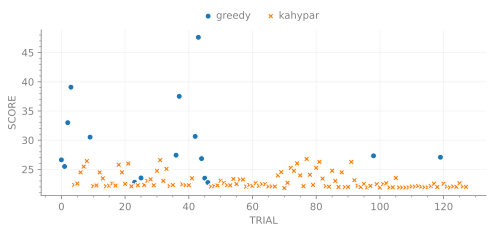

(<Figure size 800x300 with 1 Axes>, <Axes: xlabel='TRIAL', ylabel='SCORE'>)

In [6]:
opt.plot_trials()

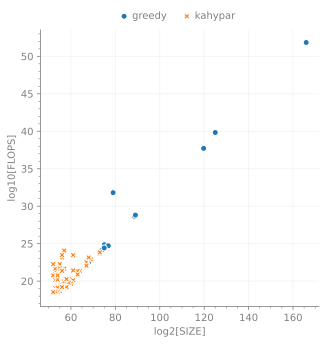

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='log2[SIZE]', ylabel='log10[FLOPS]'>)

In [7]:
opt.plot_scatter()

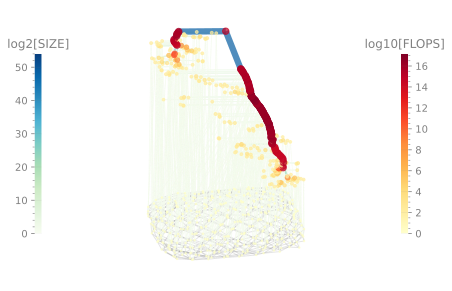

(<Figure size 500x500 with 3 Axes>, <Axes: >)

In [8]:
opt.tree.plot_tent(order=True)

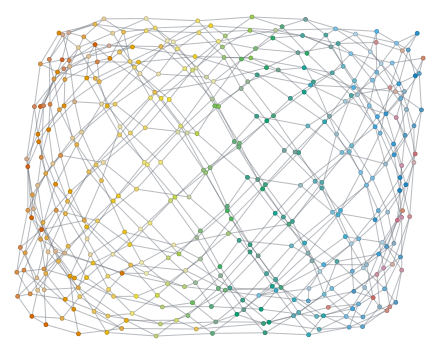

In [9]:
tn = rehs['tn']
tn.draw(tn.tags, legend=False)